In [4]:
import cv2
import os
import time

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [5]:
cap = cv2.VideoCapture('C:/Users/mbura/Desktop/test_vid.mp4')

In [42]:
x1 = 273
x2 = 873
y1 = 638
y2 = 1238

In [43]:
x_ocr1 = 916
x_ocr2 = 973
y_ocr1 = 82
y_ocr2 = 213

In [44]:
x_nav1 = 849
x_nav2 = 1056
y_nav1 = 1669
y_nav2 = 1876

In [35]:
y_nav2

1876

In [45]:
%%timeit

ret, frame = cap.read()
road = frame[x1:x2, y1:y2]
nav = frame[x_nav1:x_nav2, y_nav1:y_nav2]

road = cv2.resize(road, (128,128))
nav = cv2.resize(nav, (40,40))

7.65 ms ± 80.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
while True:
    ret, frame = cap.read()
        first = time.time()

    road = frame[x1:x2, y1:y2]
    speed = frame[x_ocr1:x_ocr2, y_ocr1:y_ocr2]
    nav = frame[x_nav1:x_nav2, y_nav1:y_nav2]
    cv2.imshow('Road', road)
    cv2.imshow('Speed', speed)
    cv2.imshow('Nav', nav)
#     print(sky.shape)
#     sky = cv2.resize(sky, (128,128))
#     cv2.imshow('Video', sky)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
print(time.time()-first)


TypeError: 'NoneType' object is not subscriptable

In [ ]:
while True:
    ret, frame = cap.read()
    speed = frame[x_nav1:x_nav2, y_nav1:y_nav2]
    print(speed.shape)
#     sky = cv2.resize(sky, (128,128))
    cv2.imshow('Video', speed)
    cv2.imshow('Video', speed)
    
    if cv2.waitKey(1) == ord('q'):
        exit(0)

## OCR for Speed Recognition by Screen Capturing

In [17]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

def ocr_core(filename):
    """
    This function will handle the core OCR processing of images.
    """
    text = pytesseract.image_to_string(Image.open(filename))  # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
    return text

print(ocr_core('images/ocr_example_1.png'))

In [55]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\mbura\AppData\Local\Tesseract-OCR\tesseract.exe"

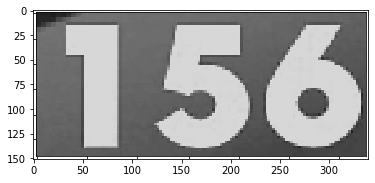

In [110]:


fname = "C:/Users/mbura/Desktop/156.jpg"
image = Image.open(fname).convert("L")
img = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [111]:
ret,img = cv2.threshold(np.array(img), 125, 255, cv2.THRESH_BINARY)
img = Image.fromarray(img.astype(np.uint8))

In [108]:
pytesseract.image_to_string(img, config='--psm 8')

'156'

In [109]:
%%timeit
pytesseract.image_to_string(img, config='--psm 8')

191 ms ± 5.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


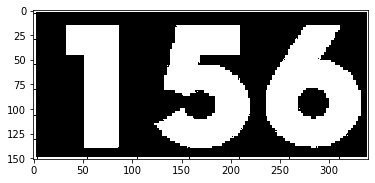

In [112]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [124]:
pytesseract.image_to_string(img, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')

'156'

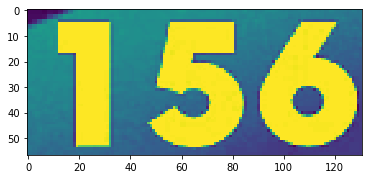

In [48]:
plt.imshow(speed[:,:,2])